In [19]:
import polars as pl

sales_series = pl.Series("sales", [150.00, 300.00, 250.00]);


In [20]:
sales_df = pl.DataFrame(
{
"sales": sales_series,
"customer_id": [24, 25, 26],
})
print(sales_df)

shape: (3, 2)
┌───────┬─────────────┐
│ sales ┆ customer_id │
│ ---   ┆ ---         │
│ f64   ┆ i64         │
╞═══════╪═════════════╡
│ 150.0 ┆ 24          │
│ 300.0 ┆ 25          │
│ 250.0 ┆ 26          │
└───────┴─────────────┘


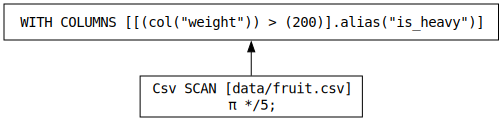

In [21]:
lazy_df = pl.scan_csv("data/fruit.csv").with_columns(
    is_heavy=pl.col("weight") > 200
)
lazy_df.show_graph()

In [22]:
coordinates = pl.DataFrame(
    [
        pl.Series("point_2d", [[1, 3], [2, 5]]),
        pl.Series("point_3d", [[1, 7, 3], [8, 1, 0]]),
    ],
    schema={
        "point_2d": pl.Array(shape=2, inner=pl.Int64),
        "point_3d": pl.Array(shape=3, inner=pl.Int64),
    },
)
print(coordinates)

shape: (2, 2)
┌───────────────┬───────────────┐
│ point_2d      ┆ point_3d      │
│ ---           ┆ ---           │
│ array[i64, 2] ┆ array[i64, 3] │
╞═══════════════╪═══════════════╡
│ [1, 3]        ┆ [1, 7, 3]     │
│ [2, 5]        ┆ [8, 1, 0]     │
└───────────────┴───────────────┘


In [23]:
weather_readings = pl.DataFrame(
    {
        "temperature": [[72.5, 75.0, 77.3], [68.0, 70.2]],
        "wind_speed": [[15, 20], [10, 12, 14, 16]],
    }
)
print(weather_readings)

shape: (2, 2)
┌────────────────────┬────────────────┐
│ temperature        ┆ wind_speed     │
│ ---                ┆ ---            │
│ list[f64]          ┆ list[i64]      │
╞════════════════════╪════════════════╡
│ [72.5, 75.0, 77.3] ┆ [15, 20]       │
│ [68.0, 70.2]       ┆ [10, 12, … 16] │
└────────────────────┴────────────────┘


In [24]:
rating_series = pl.Series(
    "ratings",
    [
        {"Movie": "Cars", "Theatre": "NE", "Avg_Rating":4.5},
        {"Movie": "Toy Story", "Theatre": "ME", "Avg_Rating":4.9},
    ],
)
print(rating_series)

shape: (2,)
Series: 'ratings' [struct[3]]
[
	{"Cars","NE",4.5}
	{"Toy Story","ME",4.9}
]


In [25]:
missing_df = pl.DataFrame (
    {
        "value": [None, 2, 3, 4, None, None, 7, 8, 9, None],
    },
)
print(missing_df)

shape: (10, 1)
┌───────┐
│ value │
│ ---   │
│ i64   │
╞═══════╡
│ null  │
│ 2     │
│ 3     │
│ 4     │
│ null  │
│ null  │
│ 7     │
│ 8     │
│ 9     │
│ null  │
└───────┘


In [26]:
print(missing_df.with_columns(filled_with_single=pl.col("value").fill_null(-1)))


shape: (10, 2)
┌───────┬────────────────────┐
│ value ┆ filled_with_single │
│ ---   ┆ ---                │
│ i64   ┆ i64                │
╞═══════╪════════════════════╡
│ null  ┆ -1                 │
│ 2     ┆ 2                  │
│ 3     ┆ 3                  │
│ 4     ┆ 4                  │
│ null  ┆ -1                 │
│ null  ┆ -1                 │
│ 7     ┆ 7                  │
│ 8     ┆ 8                  │
│ 9     ┆ 9                  │
│ null  ┆ -1                 │
└───────┴────────────────────┘


In [27]:
print( missing_df.with_columns(
    forward=pl.col("value").fill_null(strategy="forward"),
    backward=pl.col("value").fill_null(strategy="backward"),
    min=pl.col("value").fill_null(strategy="min"),
    max=pl.col("value").fill_null(strategy="max"),
    mean=pl.col("value").fill_null(strategy="mean"),
    zero=pl.col("value").fill_null(strategy="zero"),
    one=pl.col("value").fill_null(strategy="one"),
))

shape: (10, 8)
┌───────┬─────────┬──────────┬─────┬─────┬──────┬──────┬─────┐
│ value ┆ forward ┆ backward ┆ min ┆ max ┆ mean ┆ zero ┆ one │
│ ---   ┆ ---     ┆ ---      ┆ --- ┆ --- ┆ ---  ┆ ---  ┆ --- │
│ i64   ┆ i64     ┆ i64      ┆ i64 ┆ i64 ┆ i64  ┆ i64  ┆ i64 │
╞═══════╪═════════╪══════════╪═════╪═════╪══════╪══════╪═════╡
│ null  ┆ null    ┆ 2        ┆ 2   ┆ 9   ┆ 5    ┆ 0    ┆ 1   │
│ 2     ┆ 2       ┆ 2        ┆ 2   ┆ 2   ┆ 2    ┆ 2    ┆ 2   │
│ 3     ┆ 3       ┆ 3        ┆ 3   ┆ 3   ┆ 3    ┆ 3    ┆ 3   │
│ 4     ┆ 4       ┆ 4        ┆ 4   ┆ 4   ┆ 4    ┆ 4    ┆ 4   │
│ null  ┆ 4       ┆ 7        ┆ 2   ┆ 9   ┆ 5    ┆ 0    ┆ 1   │
│ null  ┆ 4       ┆ 7        ┆ 2   ┆ 9   ┆ 5    ┆ 0    ┆ 1   │
│ 7     ┆ 7       ┆ 7        ┆ 7   ┆ 7   ┆ 7    ┆ 7    ┆ 7   │
│ 8     ┆ 8       ┆ 8        ┆ 8   ┆ 8   ┆ 8    ┆ 8    ┆ 8   │
│ 9     ┆ 9       ┆ 9        ┆ 9   ┆ 9   ┆ 9    ┆ 9    ┆ 9   │
│ null  ┆ 9       ┆ null     ┆ 2   ┆ 9   ┆ 5    ┆ 0    ┆ 1   │
└───────┴─────────┴──────────┴─────┴────

In [28]:
print(missing_df.with_columns(
    expression_min=pl.col("value").fill_null(pl.col("value").mean()),
))

shape: (10, 2)
┌───────┬────────────────┐
│ value ┆ expression_min │
│ ---   ┆ ---            │
│ i64   ┆ f64            │
╞═══════╪════════════════╡
│ null  ┆ 5.5            │
│ 2     ┆ 2.0            │
│ 3     ┆ 3.0            │
│ 4     ┆ 4.0            │
│ null  ┆ 5.5            │
│ null  ┆ 5.5            │
│ 7     ┆ 7.0            │
│ 8     ┆ 8.0            │
│ 9     ┆ 9.0            │
│ null  ┆ 5.5            │
└───────┴────────────────┘


In [29]:
print(missing_df.interpolate())

shape: (10, 1)
┌───────┐
│ value │
│ ---   │
│ f64   │
╞═══════╡
│ null  │
│ 2.0   │
│ 3.0   │
│ 4.0   │
│ 5.0   │
│ 6.0   │
│ 7.0   │
│ 8.0   │
│ 9.0   │
│ null  │
└───────┘


In [30]:
string_df = pl.DataFrame({"id": ["10000", "20000", "30000"]})
print(string_df)
print(f"Оценочный размер в байтах: {string_df.estimated_size('b')}")

shape: (3, 1)
┌───────┐
│ id    │
│ ---   │
│ str   │
╞═══════╡
│ 10000 │
│ 20000 │
│ 30000 │
└───────┘
Оценочный размер в байтах: 15


In [31]:
int_df = string_df.select(pl.col("id").cast(pl.UInt16))
print(int_df)
print(f"Оценочный размер в байтах: {int_df.estimated_size('b')}")

shape: (3, 1)
┌───────┐
│ id    │
│ ---   │
│ u16   │
╞═══════╡
│ 10000 │
│ 20000 │
│ 30000 │
└───────┘
Оценочный размер в байтах: 6


In [32]:
data_types_df = pl.DataFrame(
    {
        "id": [10000, 20000, 30000],
        "value":[1.0, 2.0, 3.0],
        "value2": ["1", "2", "3"],
    }
)
print(data_types_df.cast(pl.UInt16))

shape: (3, 3)
┌───────┬───────┬────────┐
│ id    ┆ value ┆ value2 │
│ ---   ┆ ---   ┆ ---    │
│ u16   ┆ u16   ┆ u16    │
╞═══════╪═══════╪════════╡
│ 10000 ┆ 1     ┆ 1      │
│ 20000 ┆ 2     ┆ 2      │
│ 30000 ┆ 3     ┆ 3      │
└───────┴───────┴────────┘


In [34]:
print(data_types_df.cast({"id": pl.UInt16, "value": pl.Float32, "value2": pl.UInt8}))

shape: (3, 3)
┌───────┬───────┬────────┐
│ id    ┆ value ┆ value2 │
│ ---   ┆ ---   ┆ ---    │
│ u16   ┆ f32   ┆ u8     │
╞═══════╪═══════╪════════╡
│ 10000 ┆ 1.0   ┆ 1      │
│ 20000 ┆ 2.0   ┆ 2      │
│ 30000 ┆ 3.0   ┆ 3      │
└───────┴───────┴────────┘
